# Modelos Lineales Generalizados (GML)

## Regresión Lineal Gaussiana

In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
gdf = gpd.read_file("https://github.com/algarciach/AnalisisGeoespacial/raw/main/Covid19_model/Data/covid19_municipios_antioquia.gpkg")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   codigo_municipio     125 non-null    object  
 1   nombre_municipio     125 non-null    object  
 2   codigo_subregion     125 non-null    object  
 3   nombre_subregion     125 non-null    object  
 4   area_municipio       125 non-null    float64 
 5   altitud              125 non-null    float64 
 6   temperatura          125 non-null    float64 
 7   humedad_relativa     125 non-null    float64 
 8   poblacion            125 non-null    int64   
 9   densidad             125 non-null    float64 
 10  muertes_covid19      125 non-null    int64   
 11  recuperados_covid19  125 non-null    int64   
 12  cfr                  125 non-null    float64 
 13  geometry             125 non-null    geometry
dtypes: float64(6), geometry(1), int64(3), object(4)
memory usage: 13.8

In [ ]:
gdf["y_log"] = np.log(gdf["cfr"] + 1)
var = ['area_municipio', 'altitud', 'temperatura', 'humedad_relativa', 'densidad']

st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

X = sm.add_constant(X_scaled)
y = gdf["y_log"]

model = sm.OLS(y, X).fit()
print(model.summary())

```text
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     5.903
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           6.55e-05
Time:                        00:16:58   Log-Likelihood:                -33.541
No. Observations:                 125   AIC:                             79.08
Df Residuals:                     119   BIC:                             96.05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3239      0.029     45.639      0.000       1.266       1.381
x1            -0.0195      0.036     -0.543      0.588      -0.091       0.052
x2            -0.2757      0.213     -1.292      0.199      -0.698       0.147
x3            -0.1397      0.212     -0.660      0.511      -0.559       0.280
x4            -0.0461      0.034     -1.365      0.175      -0.113       0.021
x5            -0.0492      0.030     -1.624      0.107      -0.109       0.011
==============================================================================
Omnibus:                        1.859   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.486
Skew:                          -0.040   Prob(JB):                        0.476
Kurtosis:                       3.528   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

**Conclusiones** El modelo de regresión gaussiano OLS es estadísticamente significativo en su conjunto, lo que significa que las variables independientes combinadas tienen un efecto sobre la variable dependiente. Sin embargo, el poder explicativo del modelo es bajo (R-squared), lo que sugiere que hay mucha variabilidad en la variable dependiente que no está siendo capturada por este conjunto de predictores.

Lo más notable es que, ninguna de las variables independientes individuales (x1 a x5) es estadísticamente significativa. Esto implica que, aunque el modelo como un todo es "útil", no se puede concluir con confianza que alguna de las variables incluidas individualmente tenga un impacto significativo en la variable dependiente.

Los diagnósticos del modelo (normalidad de residuos, ausencia de autocorrelación y baja multicolinealidad) son generalmente buenos, lo que indica que los supuestos del OLS se cumplen razonablemente bien.

In [5]:
# Obtener las predicciones
y_pred = model.predict(X)
gdf["y_pred"] = y_pred

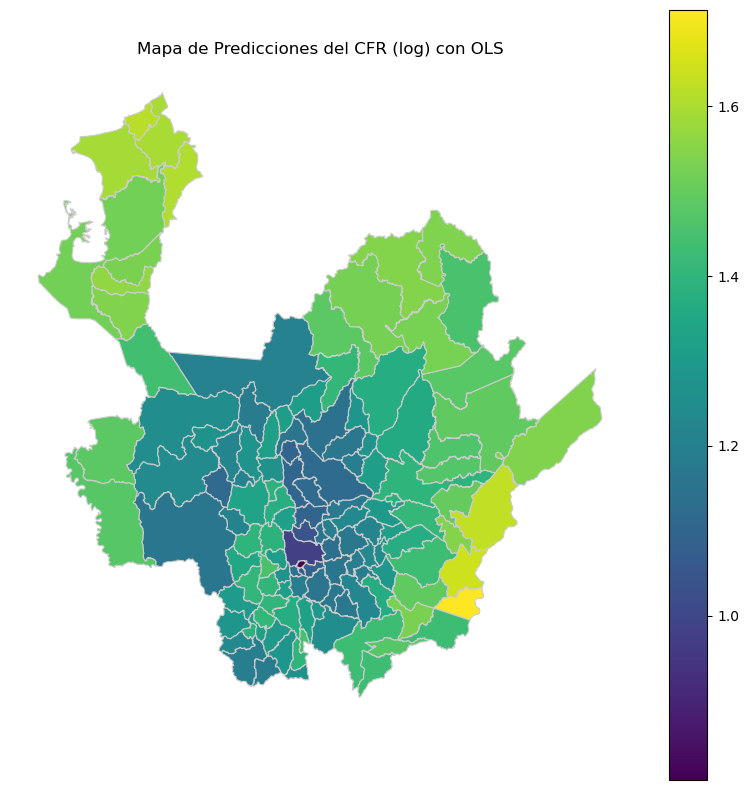

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
gdf.plot(column="y_pred", cmap="viridis", legend=True, ax=ax, linewidth=0.8, edgecolor="0.8")
ax.set_title("Mapa de Predicciones del CFR (log) con OLS")
ax.set_axis_off()
plt.show()

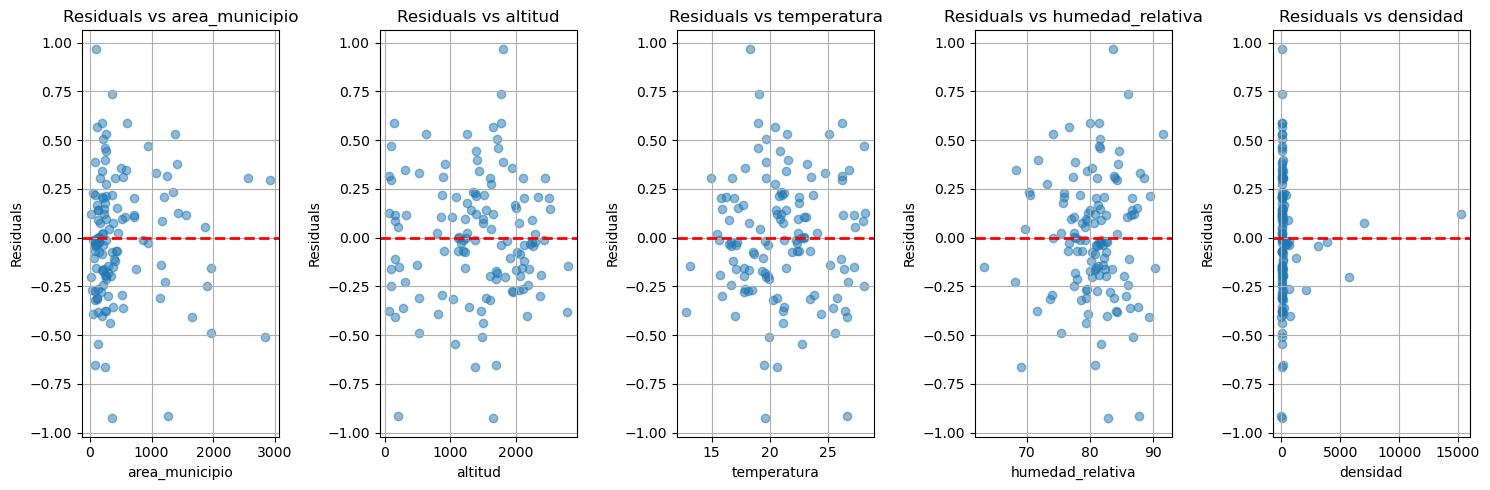

In [7]:
# Calculate the residuals
residuals = y - y_pred

# Create figure for residuals
plt.figure(figsize=(15, 5))

for i, variable in enumerate(var):
    plt.subplot(1, len(var), i + 1)
    plt.scatter(gdf[variable], residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.title(f'Residuals vs {variable}')
    plt.xlabel(variable)
    plt.ylabel('Residuals')
    plt.grid(True)
    
plt.tight_layout()
plt.show()

## Regresión Logística

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
gdf['evento_cfr'] = np.where(gdf['cfr'] > 3, 1, 0)

var = ['area_municipio', 'altitud', 'temperatura', 'humedad_relativa', 'densidad']
y = gdf['evento_cfr']

st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])
X = sm.add_constant(X_scaled)

model = sm.Logit(y, X).fit()
print(model.summary())

```text
Optimization terminated successfully.
         Current function value: 0.573381
         Iterations 10
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             evento_cfr   No. Observations:                  125
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                  0.1697
Time:                        00:52:59   Log-Likelihood:                -71.673
converged:                       True   LL-Null:                       -86.319
Covariance Type:            nonrobust   LLR p-value:                 2.031e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0279      0.703     -1.463      0.144      -2.405       0.349
x1            -0.1267      0.247     -0.513      0.608      -0.611       0.357
x2            -0.8821      1.516     -0.582      0.561      -3.853       2.089
x3            -0.1838      1.501     -0.122      0.903      -3.127       2.759
x4            -0.2996      0.236     -1.267      0.205      -0.763       0.164
x5            -5.0230      3.436     -1.462      0.144     -11.757       1.711
==============================================================================
```


In [10]:
y_prob = model.predict(X)

gdf['probability_eventCFR'] = y_prob


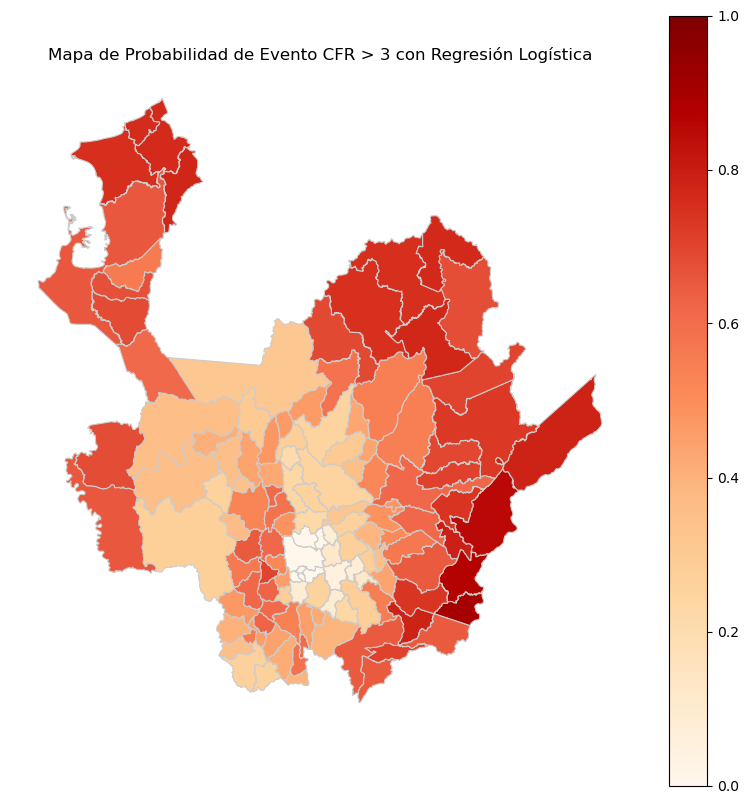

In [11]:
# Plot map with probabilities predicted by the logistic regression
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='probability_eventCFR', cmap='OrRd', legend=True, ax=ax, linewidth=0.8, edgecolor='0.8', vmin=0, vmax=1)
ax.set_title('Mapa de Probabilidad de Evento CFR > 3 con Regresión Logística')
ax.set_axis_off()
plt.show()

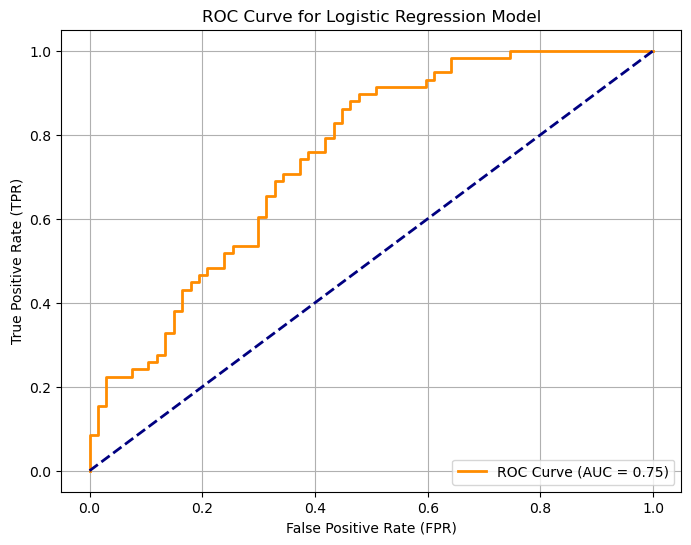

In [12]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

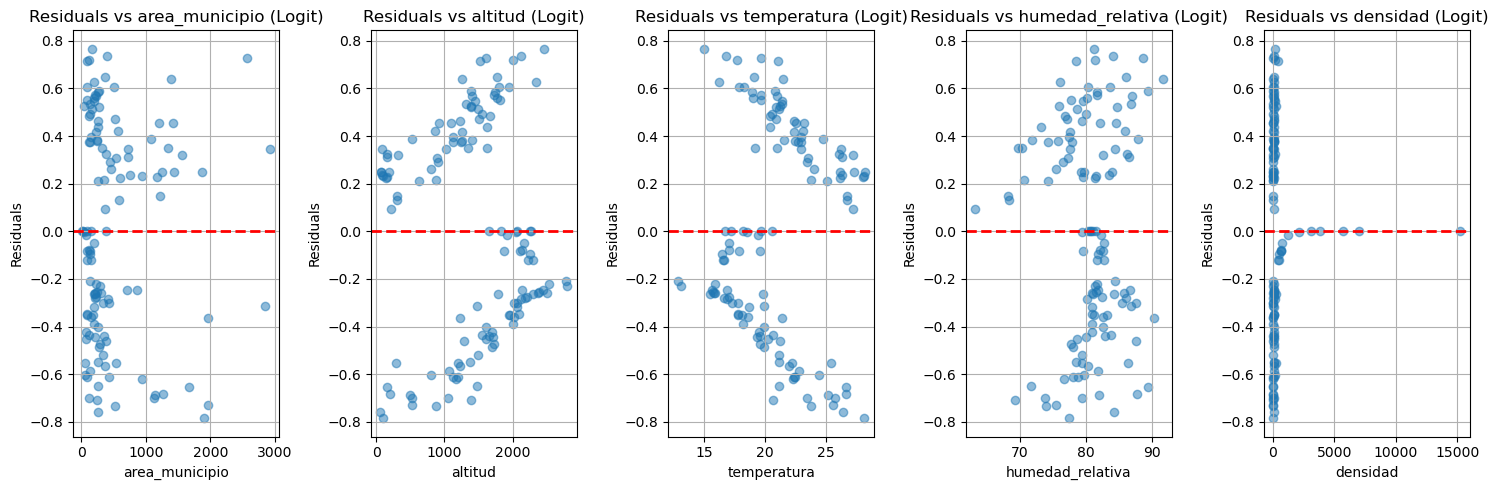

In [13]:
# Calculate the residuals for the logistic regression model
residuals_logit = y - y_prob
# Create figure for residuals of logistic regression
plt.figure(figsize=(15, 5))
for i, variable in enumerate(var):
    plt.subplot(1, len(var), i + 1)
    plt.scatter(gdf[variable], residuals_logit, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.title(f'Residuals vs {variable} (Logit)')
    plt.xlabel(variable)
    plt.ylabel('Residuals')
    plt.grid(True)
plt.tight_layout()
plt.show()

## Regresión de Poisson

In [14]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

In [ ]:
y = gdf['cfr']
var = ['altitud', 'temperatura', 'humedad_relativa', 'densidad'] # No area_municipio for GLM
exposure = np.log(gdf['area_municipio'])

st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])
X = sm.add_constant(X_scaled)
poisson_model_offset = GLM(y, X, family=families.Poisson(), offset=exposure).fit()

print(poisson_model_offset.summary())

```text
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    cfr   No. Observations:                  125
Model:                            GLM   Df Residuals:                      120
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -328.59
Date:                Wed, 25 Jun 2025   Deviance:                       296.11
Time:                        01:26:00   Pearson chi2:                     448.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5448
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9109      0.053    -92.889      0.000      -5.015      -4.807
x1             1.2824      0.404      3.177      0.001       0.491       2.073
x2             0.8846      0.396      2.232      0.026       0.108       1.661
x3            -0.2210      0.049     -4.549      0.000      -0.316      -0.126
x4             0.0983      0.077      1.275      0.202      -0.053       0.249
==============================================================================
```

**Conclusiones**  
**Altitud y Temperatura:** Ambas variables están positiva y significativamente relacionadas con la Tasa de Letalidad. Esto podría sugerir que, en las condiciones evaluadas, las regiones con mayor altitud y temperaturas más elevadas tienden a presentar una mayor letalidad por COVID-19.

**Humedad Relativa:** Esta variable tiene un efecto protector, es decir, una mayor humedad relativa se asocia con una menor Tasa de Letalidad.

**Densidad Poblacional:** Contrario a lo que a menudo se podría esperar, la densidad poblacional no emerge como un predictor individual significativo de la letalidad en este modelo.

In [16]:
# Get predictions
y_pred_offset = poisson_model_offset.predict(X)
gdf['predicted_cfr_offset'] = y_pred_offset

# Calculate residuals
gdf['difference_cfr_offset'] = gdf['cfr'] - gdf['predicted_cfr_offset']

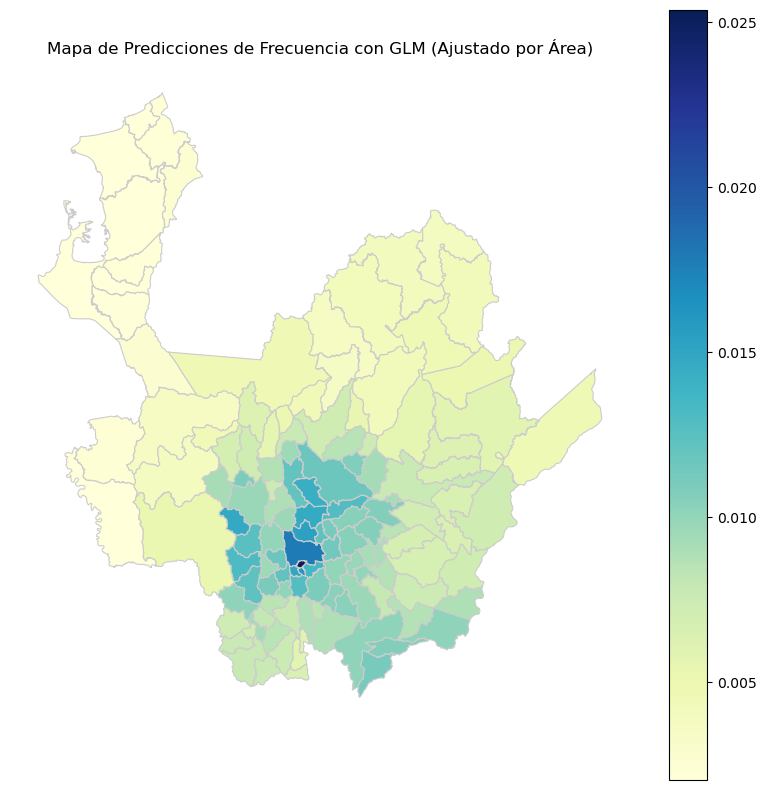

In [17]:
# Plotting the predictions with offset
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_cfr_offset', cmap='YlGnBu', legend=True, ax=ax, linewidth=0.8, edgecolor='0.8')
ax.set_title('Mapa de Predicciones de Frecuencia con GLM (Ajustado por Área)')
ax.set_axis_off()
plt.show()

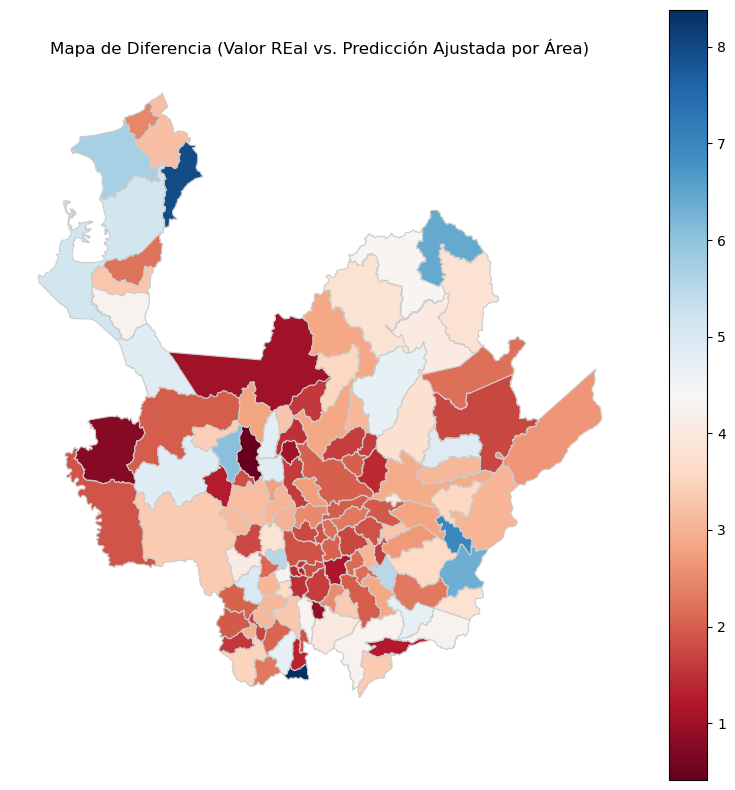

In [18]:
# Plotting the residuals for GLM with offset
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_cfr_offset', cmap='RdBu', legend=True, ax=ax, linewidth=0.8, edgecolor='0.8')
ax.set_title('Mapa de Diferencia (Valor REal vs. Predicción Ajustada por Área)')
ax.set_axis_off()
plt.show()

## Regresión Binomial Negativa

In [19]:
y = gdf['cfr']
var = ['altitud', 'temperatura', 'humedad_relativa', 'densidad']  # No area_municipio for GLM
exposure = np.log(gdf['area_municipio'])

st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])
X = sm.add_constant(X_scaled)

negative_binomial_model_offset = GLM(y, X, family=families.NegativeBinomial()).fit()
print(negative_binomial_model_offset.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cfr   No. Observations:                  125
Model:                            GLM   Df Residuals:                      120
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.09
Date:                Wed, 25 Jun 2025   Deviance:                       17.235
Time:                        01:49:57   Pearson chi2:                     17.9
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03453
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0760      0.104     10.356      0.0

/usr/local/Caskroom/miniforge/base/envs/geo/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


```text
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    cfr   No. Observations:                  125
Model:                            GLM   Df Residuals:                      120
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.09
Date:                Wed, 25 Jun 2025   Deviance:                       17.235
Time:                        01:49:57   Pearson chi2:                     17.9
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03453
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0760      0.104     10.356      0.000       0.872       1.280
x1            -0.4185      0.742     -0.564      0.573      -1.874       1.037
x2            -0.2465      0.749     -0.329      0.742      -1.714       1.221
x3            -0.0586      0.115     -0.509      0.611      -0.284       0.167
x4            -0.0828      0.121     -0.682      0.495      -0.321       0.155
==============================================================================
```

**Conclusiones**  
Pobre Poder Explicativo: La principal conclusión de este modelo de Binomial Negativa es su muy bajo poder predictivo (Pseudo R-cuadrado ~0.03). Esto significa que las variables altitud, temperatura, humedad_relativa y densidad explican muy poco de la variabilidad en la Tasa de Letalidad cuando se asume una distribución Binomial Negativa.

Ausencia de Predictores Significativos: A diferencia del modelo Poisson anterior, ninguna de tus variables predictoras individuales (altitud, temperatura, humedad relativa, densidad poblacional) resultó ser estadísticamente significativa en este modelo de Binomial Negativa. Esto contrasta fuertemente con los resultados del modelo Poisson, donde altitud, temperatura y humedad_relativa sí eran significativas.

Elección del Modelo: El hecho de que el Log-Likelihood sea "mejor" en el modelo Binomial Negativa sugiere que podría haber sobredispersion en tus datos de CFR. Sin embargo, el drástico descenso en el Pseudo R-cuadrado y la pérdida de significancia de todos los predictores indican que, aunque la Binomial Negativa puede manejar la sobredispersion, este modelo particular no captura las relaciones subyacentes entre tus predictores y la CFR tan efectivamente como lo hizo el modelo Poisson.

En resumen, aunque el modelo de Binomial Negativa puede ser teóricamente más apropiado si hay sobredispersion, los resultados prácticos de este ajuste sugieren que es un modelo mucho menos explicativo y menos útil para identificar los factores que influyen en la Tasa de Letalidad que el modelo Poisson que ajustaste previamente. El modelo Poisson parecía identificar patrones claros y significativos, mientras que este modelo de Binomial Negativa no lo hace.

In [20]:
# Get predictions for Negative Binomial model with offset
y_pred_nb_offset = negative_binomial_model_offset.predict(X)

gdf['predicted_cfr_nb_offset'] = y_pred_nb_offset

# Calculate residuals for Negative Binomial model with offset
gdf['difference_cfr_nb_offset'] = gdf['cfr'] - gdf['predicted_cfr_nb_offset']

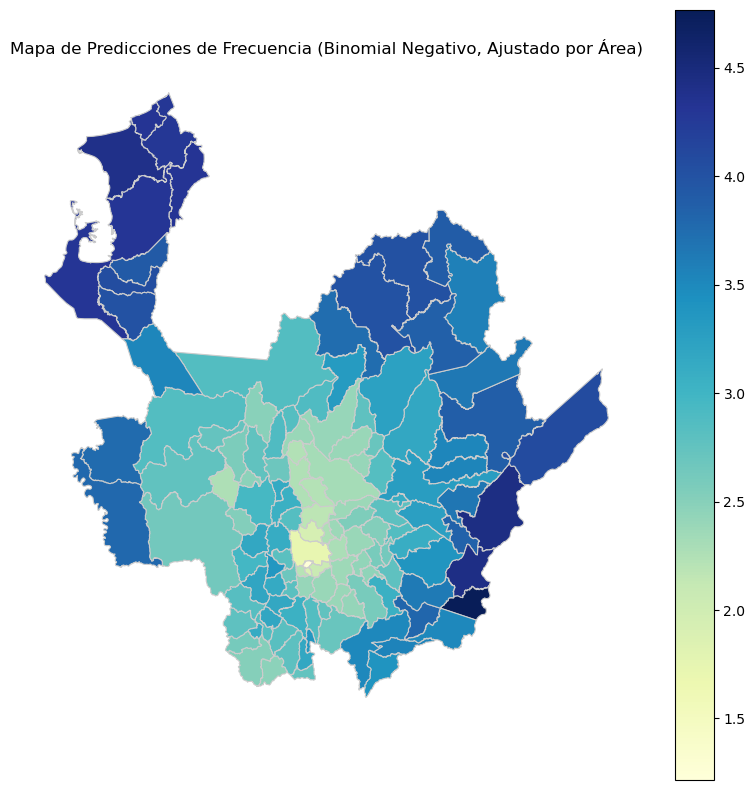

In [22]:
# Plotting the predictions for Negative Binomial model with offset
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_cfr_nb_offset', cmap='YlGnBu', legend=True, ax=ax, linewidth=0.8, edgecolor='0.8')
ax.set_title('Mapa de Predicciones de Frecuencia (Binomial Negativo, Ajustado por Área)')
ax.set_axis_off()
plt.show()

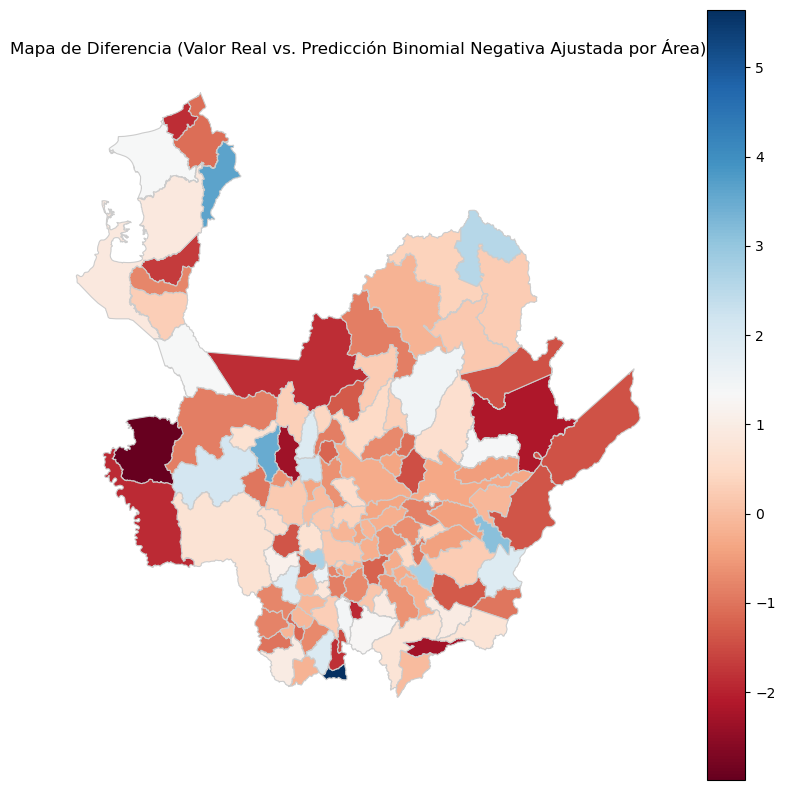

In [23]:
# Plotting the residuals for Negative Binomial model with offset
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_cfr_nb_offset', cmap='RdBu', legend=True, ax=ax, linewidth=0.8, edgecolor='0.8')
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción Binomial Negativa Ajustada por Área)')  
ax.set_axis_off()
plt.show()

## Modelo de Ceros Inflados de Poisson

In [25]:
from statsmodels.discrete.count_model import ZeroInflatedPoisson

In [26]:
y = gdf['cfr']
var = ['altitud', 'temperatura', 'humedad_relativa', 'densidad']  # No area_municipio for ZIP
exposure = np.log(gdf['area_municipio'])

st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

X = sm.add_constant(X_scaled)
zip_model_offset = ZeroInflatedPoisson(y, X, exposure=exposure).fit()

print(zip_model_offset.summary())

Optimization terminated successfully.
         Current function value: 1.744501
         Iterations: 29
         Function evaluations: 32
         Gradient evaluations: 32
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                     cfr   No. Observations:                  125
Model:             ZeroInflatedPoisson   Df Residuals:                      120
Method:                            MLE   Df Model:                            4
Date:                 Wed, 25 Jun 2025   Pseudo R-squ.:                 0.01305
Time:                         02:06:25   Log-Likelihood:                -218.06
converged:                        True   LL-Null:                       -220.95
Covariance Type:             nonrobust   LLR p-value:                    0.2172
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -16.6002

```text
Optimization terminated successfully.
         Current function value: 1.744501
         Iterations: 29
         Function evaluations: 32
         Gradient evaluations: 32
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                     cfr   No. Observations:                  125
Model:             ZeroInflatedPoisson   Df Residuals:                      120
Method:                            MLE   Df Model:                            4
Date:                 Wed, 25 Jun 2025   Pseudo R-squ.:                 0.01305
Time:                         02:06:25   Log-Likelihood:                -218.06
converged:                        True   LL-Null:                       -220.95
Covariance Type:             nonrobust   LLR p-value:                    0.2172
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -16.6002    359.947     -0.046      0.963    -722.084     688.884
const            -0.6533      0.053    -12.359      0.000      -0.757      -0.550
x1               -0.1423      0.364     -0.391      0.696      -0.856       0.571
x2               -0.0672      0.367     -0.183      0.855      -0.787       0.653
x3               -0.0783      0.053     -1.465      0.143      -0.183       0.026
x4               -0.0299      0.077     -0.389      0.697      -0.181       0.121
=================================================================================
```

**Conclusiones**

Este modelo de Regresión de Poisson con Inflación de Ceros no es adecuado para explicar la Tasa de Letalidad por COVID-19 en tu conjunto de datos. Su poder explicativo es extremadamente bajo, y ninguna de tus variables predictoras principales (altitud, temperatura, humedad relativa, densidad poblacional) muestra una relación estadísticamente significativa con la CFR. Además, no se justifica la complejidad de la parte de "inflación de ceros", ya que no resulta significativa.



In [27]:
# Get predictions for Zero-Inflated Poisson model with offset
y_pred_zip_offset = zip_model_offset.predict(X)
gdf['predicted_cfr_zip_offset'] = y_pred_zip_offset

gdf['difference_cfr_zip_offset'] = gdf['cfr'] - gdf['predicted_cfr_zip_offset']

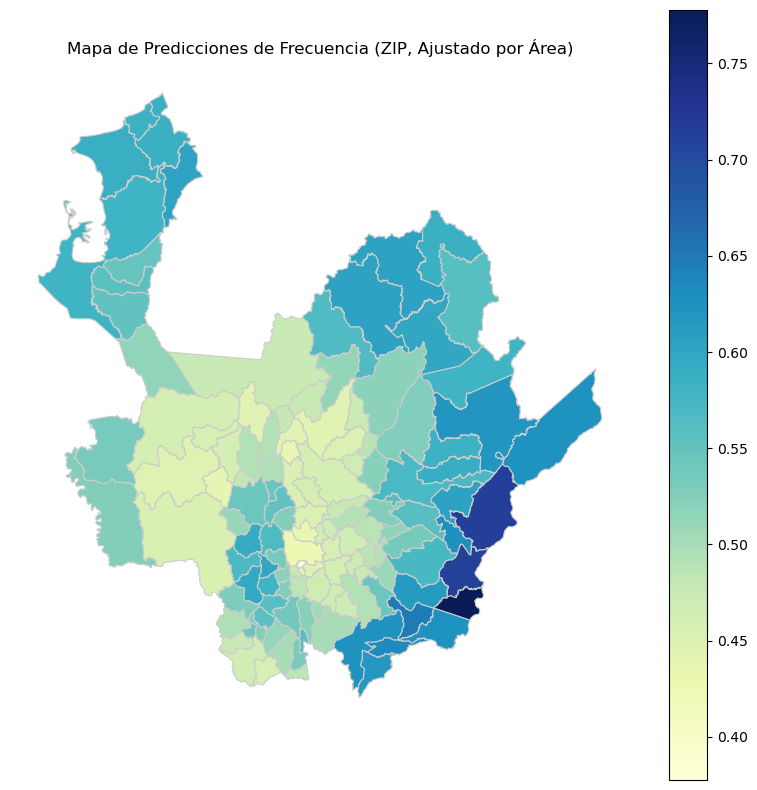

In [28]:
# Plotting the predictions for Zero-Inflated Poisson model with offset
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_cfr_zip_offset', cmap='YlGnBu', legend=True, ax=ax, linewidth=0.8, edgecolor='0.8')
ax.set_title('Mapa de Predicciones de Frecuencia (ZIP, Ajustado por Área)')
ax.set_axis_off()
plt.show()

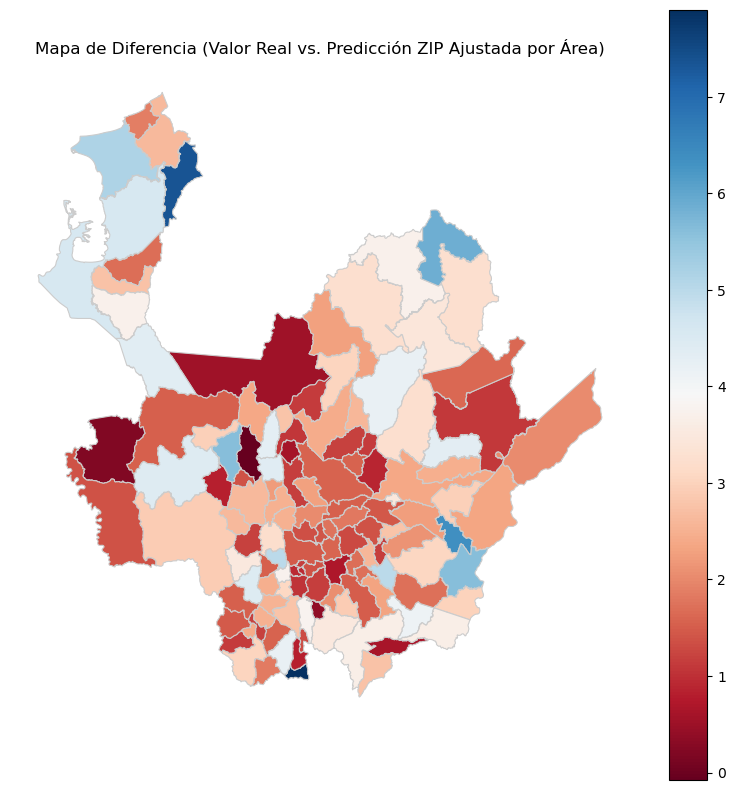

In [29]:
# Plotting the residuals for Zero-Inflated Poisson model with offset
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_cfr_zip_offset', cmap='RdBu', legend=True, ax=ax, linewidth=0.8, edgecolor='0.8')
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción ZIP Ajustada por Área)')
ax.set_axis_off()
plt.show()